In [ ]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using StatsBase, JLD

### Approximate SyncRank with sparsified Laplacian 


MUN graph model

least eigval of Laplacian= 0.010952482451912535
method: 

DPP(K) unif
least eigenvalue of sparsifier: 0.0003832452365544987
least eigenvalue of sparsifier: 

0.006094156732809465


least eigenvalue of sparsifier: 0.007074258276168765
least eigenvalue of sparsifier: 

0.0084867670404235


least eigenvalue of sparsifier: 0.0087471796391797
least eigenvalue of sparsifier: 

0.010536703364406411


least eigenvalue of sparsifier: 0.010235002279548114
method: 

DPP(K) JL-LS
least eigenvalue of sparsifier: 0.0002991621535899224
least eigenvalue of sparsifier: 

0.00617145599437784


least eigenvalue of sparsifier: 0.007180791578148342
least eigenvalue of sparsifier: 

0.008836765414751379


least eigenvalue of sparsifier: 0.009863143742329767
least eigenvalue of sparsifier: 

0.008806157850997342


least eigenvalue of sparsifier: 0.008247615658184309
method: 

DPP(K) LS
least eigenvalue of sparsifier: 0.0001629386010795152
least eigenvalue of sparsifier: 

0.0065240784077817155


least eigenvalue of sparsifier: 0.008277603797765563
least eigenvalue of sparsifier: 

0.007567184917738056


least eigenvalue of sparsifier: 0.009537441605598204
least eigenvalue of sparsifier: 

0.008488015475792043


least eigenvalue of sparsifier: 0.008852369652729751
method: 

iid JL-LS
least eigenvalue of sparsifier: 0.00019779510879326299
least eigenvalue of sparsifier: 

0.0022077965473262483


least eigenvalue of sparsifier: 0.007010423531910085
least eigenvalue of sparsifier: 

0.00791128346650131


least eigenvalue of sparsifier: 0.00920598734817981
least eigenvalue of sparsifier: 

0.009588925449880482


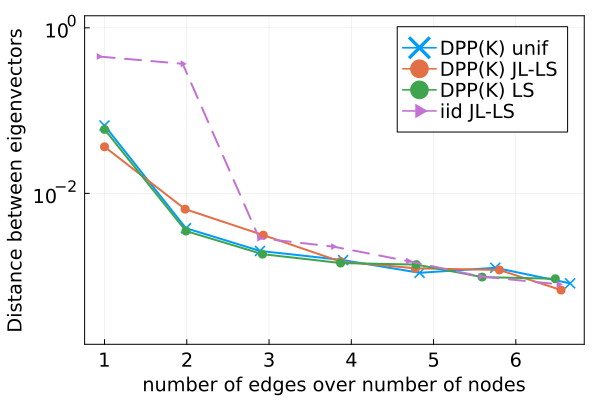

least eigenvalue of sparsifier: 0.009705319822027578


In [7]:
type = "MUN" 

rng = Random.default_rng()

# graph parameters
n = 100
p = 0.9
eta = 0.2

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# simulation parameters
n_batch = 7 # maximum number of batches considered
n_rep = 1 # number of runs

# regularization parameter
q = 0

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# print least eigenvalues
# B = magnetic_incidence(meta_g)
# l = eigvals(B' * B)
# println("least eigenvalue: ", l[1:3])


methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    "DPP(K) LS",
    "iid JL-LS",
    # "iid LS",
    #"ST JL-LS",
    # "ST LS",
]

D_results = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng; methods)
# plotting distance between eigenvectors
metric= "err"
y_limits = (1.5*1e-4, 1.4)
legendposition=:topright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

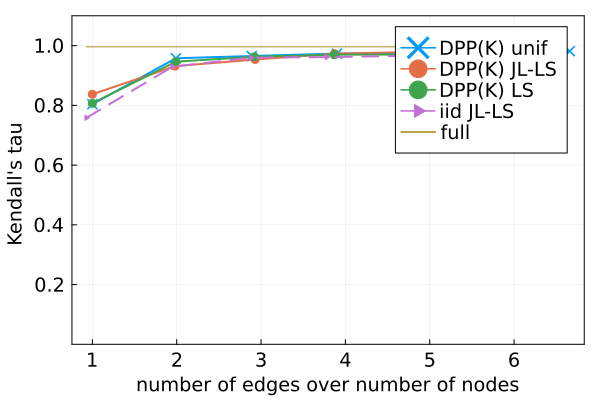

In [8]:
# plotting Kendall's tau between rankings

metric= "tau" 
y_limits = (1.5*1e-4, 1.1)

legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)

name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

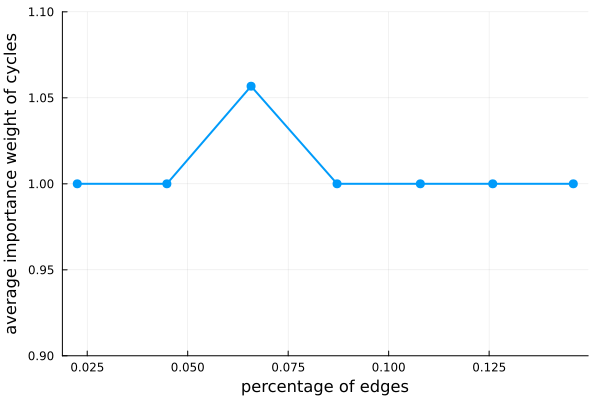

In [9]:
# plotting average importance weight of cycles
metric = "weight"
metric_std = metric * "_std"

method = "DPP(K) LS"
D = D_results[method]
n = D["n"]
m = D["m"]
x = D["pc_edges"]
y = D[metric]
y_er = D[metric_std]
y_limits = (0.9, 1.1)

plt = plot(
    x,
    y;
    yerror=y_er,
    markerstrokecolor=:auto,
    markershape=:circle,
    markersize=5,
    linewidth=2,
    markerstrokewidth=2,
    legend = false
)
xlabel!("percentage of edges")
ylabel!("average importance weight of cycles")

ylims!(y_limits)

display(plt)

name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

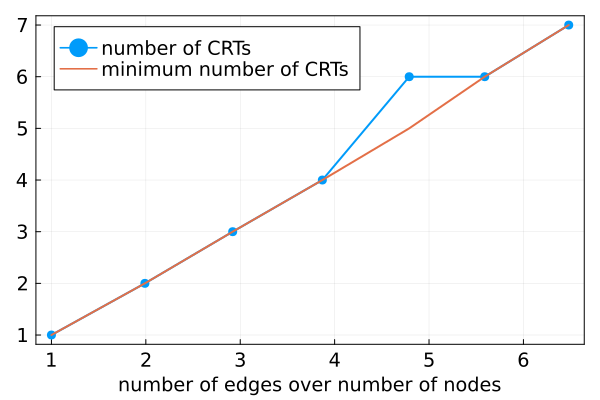

In [10]:
# plotting number of cycle rooted trees wrt number of batches

method = "DPP(K) LS"
legendposition=:topleft
plot_nb_cycles(D_results,method;legendposition)

metric = "number_CRTs"
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")


 ERO graph model

In [11]:
type = "ERO" 

rng = Random.default_rng()

# graph parameters
n = 100
p = 0.9
eta = 0.2

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# simulation parameters
n_batch = 7 # maximum number of batches considered
n_rep = 10 # number of runs

# regularization parameter
q = 0

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# print least eigenvalues
# B = magnetic_incidence(meta_g)
# l = eigvals(B' * B)
# println("least eigenvalue: ", l[1:3])

D_results = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng;methods)

# plotting distance between eigenvectors
metric= "err"
y_limits = (1.5*1e-4, 1.4)
legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

least eigval of Laplacian= 0.19116482599130946
method: 

DPP(K) unif
least eigenvalue of sparsifier: 0.0015835500320329444
least eigenvalue of sparsifier: 

0.0010075193972744595


least eigenvalue of sparsifier: 0.0005101051225905686
least eigenvalue of sparsifier: 

0.0012955131168149183


least eigenvalue of sparsifier: 9.5676392329448e-5
least eigenvalue of sparsifier: 

0.000473156984825498


least eigenvalue of sparsifier: 0.0016666261202266444
least eigenvalue of sparsifier: 

0.003815730240090855


least eigenvalue of sparsifier: 0.002865337533334113
least eigenvalue of sparsifier: 

0.0007717600479164323


least eigenvalue of sparsifier: 0.110209534863804
least eigenvalue of sparsifier: 

0.10496928937000687


least eigenvalue of sparsifier: 0.058918043442763524
least eigenvalue of sparsifier: 

0.06995668354683171


least eigenvalue of sparsifier: 0.07777965784063451
least eigenvalue of sparsifier: 

0.10432544275897404


least eigenvalue of sparsifier: 0.06807928693440327
least eigenvalue of sparsifier: 

0.08785144428302147


least eigenvalue of sparsifier: 0.09598269492610073
least eigenvalue of sparsifier: 

0.102877868856111


least eigenvalue of sparsifier: 0.09300712503143788
least eigenvalue of sparsifier: 

0.15890230772591213


least eigenvalue of sparsifier: 0.1145367125634957
least eigenvalue of sparsifier: 

0.13217860815927257


least eigenvalue of sparsifier: 0.1254647303700593
least eigenvalue of sparsifier: 

0.13228303449748266


least eigenvalue of sparsifier: 0.11580600540228744
least eigenvalue of sparsifier: 

0.15820244851543916


least eigenvalue of sparsifier: 0.11138288087252673
least eigenvalue of sparsifier: 

0.1181060469220925


least eigenvalue of sparsifier: 0.133875859933332
least eigenvalue of sparsifier: 

0.15611118415109515


least eigenvalue of sparsifier: 0.1647411835921959
least eigenvalue of sparsifier: 

0.12850415478091537


least eigenvalue of sparsifier: 0.08592438581823156
least eigenvalue of sparsifier: 

0.14268423921316226


least eigenvalue of sparsifier: 0.1531864566404792
least eigenvalue of sparsifier: 

0.209664764393164


least eigenvalue of sparsifier: 0.13976754198316116
least eigenvalue of sparsifier: 

0.14569098884952253


least eigenvalue of sparsifier: 0.1560834073554006
least eigenvalue of sparsifier: 

0.16535729471206564


least eigenvalue of sparsifier: 0.18136540973475226
least eigenvalue of sparsifier: 

0.13167435222076057


least eigenvalue of sparsifier: 0.12248295653698343
least eigenvalue of sparsifier: 

0.1633014971607053


least eigenvalue of sparsifier: 0.12717484926078543
least eigenvalue of sparsifier: 

0.14850175024683032


least eigenvalue of sparsifier: 0.15608892768020394
least eigenvalue of sparsifier: 

In [ ]:
# plotting distance between eigenvectors
metric= "err"
y_limits = (1.5*1e-4, 1.4)
legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

In [ ]:
# plotting Kendall's tau between rankings

metric= "tau" 
y_limits = (1.5*1e-4, 1.1)

legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition, methods)

name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

In [ ]:
# plotting number of cycle rooted trees wrt number of batches

method = "DPP(K) LS"
legendposition=:topleft
plot_nb_cycles(D_results,method;legendposition)

metric = "number_CRTs"
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

In [ ]:
# plotting average importance weight of cycles
metric = "weight"
metric_std = metric * "_std"

method = "DPP(K) LS"
D = D_results[method]
x = D["pc_edges"]
y = D[metric]
y_er = D[metric_std]
y_limits = (0.9, 3)

plt = plot(
    x,
    y;
    yerror=y_er,
    markerstrokecolor=:auto,
    markershape=:circle,
    markersize=5,
    linewidth=2,
    markerstrokewidth=2,
    legend = false
)
xlabel!("percentage of edges")
ylabel!("average importance weight of cycles")

ylims!(y_limits)

display(plt)

name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

SBM MUN


In [ ]:
rng = Random.default_rng()

# graph parameters
n = 100
p_in = 0.4
p_out = 0.1
η = 0.1
noise = 0.

# planted ranking score
planted_score = randperm(rng,n)


meta_g =  ero_mun_sbm(rng,n,p_in,p_out,η,noise;planted_score)


# simulation parameters
n_batch = 7 # maximum number of batches considered
n_rep = 1 # number of runs

# regularization parameter
q = 0

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# print least eigenvalues
# B = magnetic_incidence(meta_g)
# l = eigvals(B' * B)
# println("least eigenvalue: ", l[1:3])


methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    "DPP(K) LS",
    "iid JL-LS",
    # "iid LS",
    #"ST JL-LS",
    # "ST LS",
]

D_results = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng; methods)
# plotting distance between eigenvectors
metric= "err"
y_limits = (1.5*1e-4, 1.4)
legendposition=:topright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")